# Example: how to use PyCapse

In [1]:
import numpy as np
import sys
sys.path.append('/home/mbonici/Desktop/PyCapse/src') # write the path were you put PyCapse
import PyCapse
import matplotlib.pyplot as plt

Let's write a simple input data vector.
The input array contains:
- ln10A_s
- n_s
- h
- omega_b
- omega_cdm
- tau_reio
- xi_idx
- $\log_{10}$ a_idm_dr

In [2]:
input_test = np.array([2.8472231, 1.0196047, 0.72768, 0.0206263, 0.1492, 0.068604, 0.289396, 4.])

In [3]:
Cltt, Clee, Clte, Clpp  = PyCapse.load_emu('/home/mbonici/Desktop/Capse_trainer/notebooks/trained_weights/idm_dr/n_4/emulators_Planck_idm_dr_n4_nonlinear_halofit.bson')

If you want to check the emulators training range, you just have to check the `InMinMax` field

In [4]:
Cltt.InMinMax

8×2 Matrix{Float64}:
 2.50001    3.49979
 0.8162     1.16099
 0.60001    0.79999
 0.0198504  0.0248486
 0.05009    0.249936
 0.017823   0.0908
 7.6e-5     0.499795
 3.00288    8.99712

When running following block the first time, it will require a bit to compile (~ 1 minute).

In [5]:
ℓTT = np.arange(2,2509)
ℓPP = np.arange(8,401)
ℓEE_TE = np.arange(2,1997)
CℓTT = PyCapse.compute_Cl(input_test, Cltt)
CℓEE = PyCapse.compute_Cl(input_test, Clee)
CℓTE = PyCapse.compute_Cl(input_test, Clte)
CℓPP = PyCapse.compute_Cl(input_test, Clpp);

However, once this has been done, the emulators become blazingly fast.

In the next cell, $C_\ell$ computation command is executed ~ thousands of time, in order to perform statistical benchmarking and give you an accurate estimante of execution time.

In [6]:
%timeit PyCapse.compute_Cl(input_test, Cltt)

87.5 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


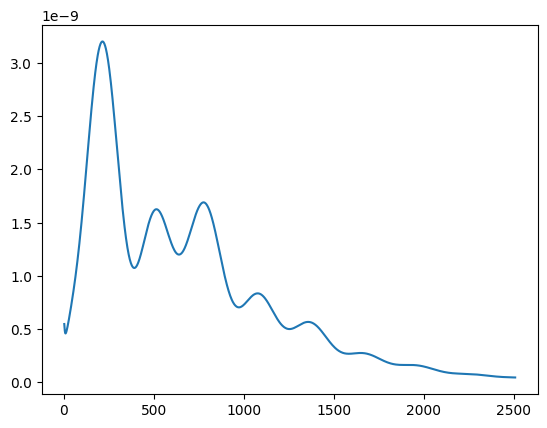

In [7]:
plt.plot(ℓTT, ℓTT*(ℓTT+1)*CℓTT)

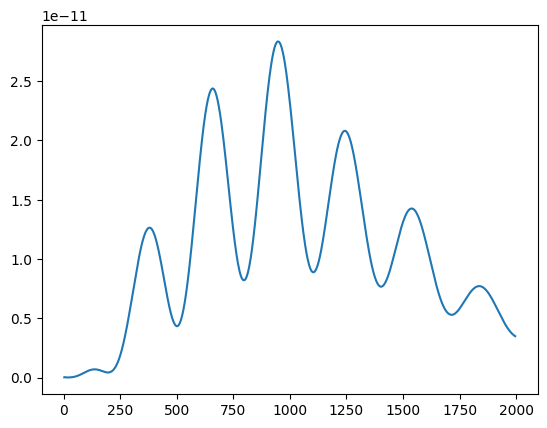

In [8]:
plt.plot(ℓEE_TE, ℓEE_TE*(ℓEE_TE+1)*CℓEE)

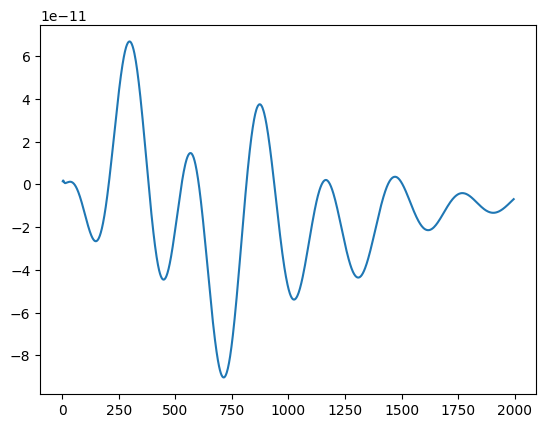

In [9]:
plt.plot(ℓEE_TE, ℓEE_TE*(ℓEE_TE+1)*CℓTE)

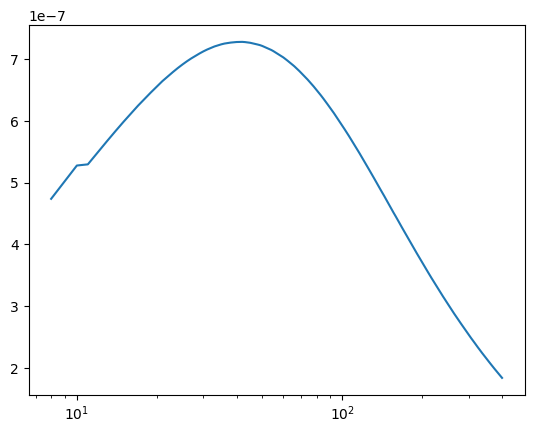

In [10]:
plt.plot(ℓPP, (ℓPP*(ℓPP+1))**2*CℓPP)
plt.xscale('log')

Fast and easy, isn't it?